In [1]:
'''
You are the data scientist at a retail company, and the marketing team is looking to 
optimize their promotional campaigns by targeting specific customer segments. the goal is
to indentify distinct groups fo customers based on their demographic information such as age, income
and spending score.

'''

'\nYou are the data scientist at a retail company, and the marketing team is looking to \noptimize their promotional campaigns by targeting specific customer segments. the goal is\nto indentify distinct groups fo customers based on their demographic information such as age, income\nand spending score.\n\n'

New customer assigned to cluster: 2


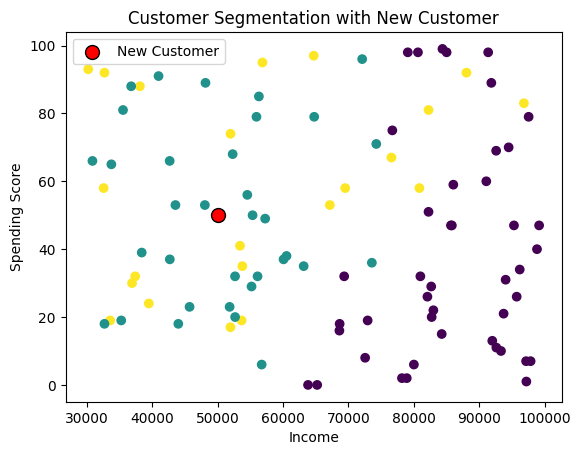

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Dataset creation
np.random.seed(42)
data = pd.DataFrame({
    'age': np.random.randint(15, 65, 100),
    'income': np.random.randint(30000, 100000, 100),
    'spending_score': np.random.randint(0, 100, 100)
})

# Add new customer to data
new_customer = pd.DataFrame({'age': [70], 'income': [50000], 'spending_score': [50]})
data_with_new = pd.concat([data, new_customer], ignore_index=True)

# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_with_new)

# Clustering
model = AgglomerativeClustering(n_clusters=3)
data_with_new['Cluster'] = model.fit_predict(scaled_data)

# Separate back the new customer's cluster
new_customer_cluster = data_with_new.iloc[-1]['Cluster']
print("New customer assigned to cluster:", int(new_customer_cluster))

# Visualization
plt.scatter(data_with_new['income'], data_with_new['spending_score'],
            c=data_with_new['Cluster'], cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.title("Customer Segmentation with New Customer")
plt.scatter(new_customer['income'], new_customer['spending_score'], 
            color='red', label='New Customer', edgecolor='black', s=100)
plt.legend()
plt.show()
